In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
### Add this image ... psudeo code for implemented kmeans
### https://www.niser.ac.in/~smishra/teach/cs460/2020/lectures/lec22/MLlecnote/pseudocode.png


# K-means : Problem 01


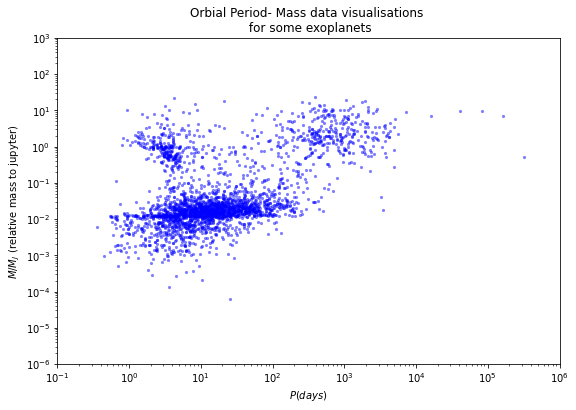

In [4]:
fig, ax = plt.subplots(1, figsize=(9, 6))

exo_planets_data = pd.read_csv('data.csv',skiprows=1)
exo_planets_data = exo_planets_data.dropna(axis="rows", how="any")
exo_planets_data.head()

m,d = exo_planets_data['mjupiter'].tolist(),  exo_planets_data['day'].tolist()

plt.scatter(d,m,alpha=0.5, lw=0, s=10, c='blue',marker='o')

plt.yscale('log', base = 10)
plt.xscale('log',base = 10)

plt.xlabel(r"$P (days)$")
plt.ylabel(r"$M/M_J$ (relative mass to jupyter)")

plt.xlim(10e-2,10e5)
plt.ylim(10e-7,10e2)

plt.title('Orbial Period- Mass data visualisations \n for some exoplanets')
plt.show()


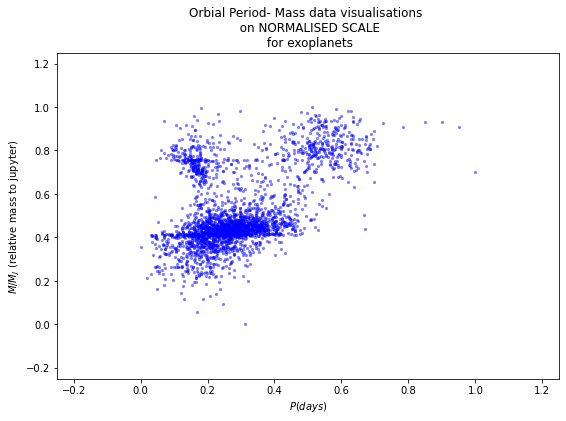

In [7]:
#### Preprocessing dataset for K-means 
'''
Involves logarithmic transformation of both vairables 
Normalising quantities to fit in between [0,1]
'''
log_m, log_d = [],[]

for ma,da in zip(m,d):
    if(ma == 0):
        log_m.append(ma)
        log_d.append(np.log10(da))
    elif(da == 0):
        log_d.append(da)
        log_m.append(np.log10(ma))

    else:
        log_d.append(np.log10(da))
        log_m.append(np.log10(ma))


fig, ax = plt.subplots(1, figsize=(9, 6))

a = log_d
log_d = np.array([(float(i)-min(a))/(max(a)-min(a)) for i in a])
a = log_m
log_m = np.array([(float(i)-min(a))/(max(a)-min(a)) for i in a])

plt.scatter(log_d,log_m,alpha=0.5, lw=0, s=10, c='blue',marker='o')

plt.xlabel(r"$P (days)$")
plt.ylabel(r"$M/M_J$ (relative mass to jupyter)")

plt.xlim(-0.25,1.25)
plt.ylim(-0.25,1.25)

plt.title('Orbial Period- Mass data visualisations \n  on NORMALISED SCALE \n for exoplanets')
plt.show()

In [8]:
import numpy as np
from scipy.spatial.distance import cdist 

def kmeans_scratch(data,K, iter_no):
    idx = np.random.choice(len(data), K, replace=False)

    '''
    Step 01 : randomly initialise mean for kth cluster 
    '''
    centroids = data[idx, :] 

    ''' 
    Step 02 : assigning n closest centers by finding the distance 
    '''

    #finding the distance between centroids and all the data points
    distances = cdist(data, centroids ,'euclidean') 
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances])
     
    #Repeating the above steps for a defined number of iterations
    for _ in range(iter_no): 
        centroids = []
        for idx in range(K):

            '''
            Step 03 :  re-estimate mean of cluster k 
            '''
            temp_cent = data[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(data, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])

    '''
    Step 04 : return cluster assigments
    '''   
    return points 

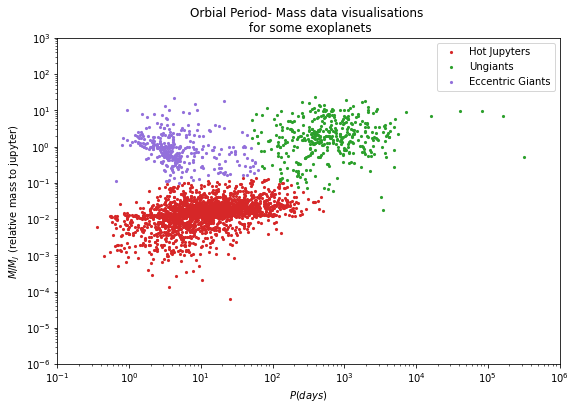

In [9]:

log_dataset = np.array([log_m,log_d]).transpose()
labels = kmeans_scratch(log_dataset, 3, 100)


cluster_colors = ['tab:red','tab:green','mediumpurple']
legend_names = ['Hot Jupyters', 'Ungiants', 'Eccentric Giants']
fig, ax = plt.subplots(1, figsize=(9, 6))

label2data = {0 : {'d': [], 'm' : []}, 1 : {'d': [], 'm' : []}, 2 : {'d': [], 'm' : []}}
for i,label in enumerate(labels):
    label2data[label]['d'].append(d[i])
    label2data[label]['m'].append(m[i])

for k,v in label2data.items():
    plt.scatter(v['d'],v['m'], color = cluster_colors[k], label = legend_names[k], alpha= 1, lw = 0, s = 10 , marker='o')

plt.legend()

plt.yscale('log', base = 10)
plt.xscale('log',base = 10)

plt.xlabel(r"$P (days)$")
plt.ylabel(r"$M/M_J$ (relative mass to jupyter)")

plt.xlim(10e-2,10e5)
plt.ylim(10e-7,10e2)

plt.title('Orbial Period- Mass data visualisations \n for some exoplanets')
plt.show()

## Problem 02 : UMAP

In [8]:
from scripts import *
import seaborn as sns;sns.set(style="ticks", color_codes=True)
import umap.umap_ as umap
# !pip3 install umap-learn  --> to install 
%matplotlib inline
%run scripts.py
from sklearn import preprocessing
from matplotlib.lines import Line2D
import numba
import pandas

<Figure size 432x288 with 0 Axes>

# redefining groups
* Hot Jupiters: $P < 10$ d, $ R > 0.8 R_J$

* Long period Giants: $R > 0.8 R_J$, $P>100$d

* sub-Neptunes from $R \in [2.5,3.8] R_{Earth}$

* Rocky planets: $1.5 < R/R_{Earth}$, $P<100$d

* sub Jupiters $R \in [3.8,9] R_{Earth}$,

 Mp, Rp, P, M*, R*, T*
 
Extra quantities calculated: planetary density and stellar luminosity

For the UMAP we're using the log of every parameter-

In [9]:
cat_eu="exoplanet.eu_catalog.csv"
params1 = ['mass','radius', 'orbital_period' , 'star_teff', 'star_mass', 'star_radius']
params2 = ['mass','radius', 'orbital_period' , 'star_teff', 'star_mass', 'star_radius']

df_eu = pd.read_csv(cat_eu, index_col=0)
df_eu = df_eu[params1]
df_eu['luminosity'] = df_eu.star_radius**2*(df_eu.star_teff/5778)**4
df_eu['density'] = df_eu.mass * jupiterMass.to('gram')/((4/3) * np.pi * (df_eu.radius * jupiterRad.to('centimeter'))**3) 
df_eu.mass = df_eu.mass * jupiterMass.to(earthMass)
df_eu.radius = df_eu.radius * jupiterRad.to(earthRad)
df_eu = pd.DataFrame.dropna(df_eu,axis=0, how='any')

df_eu=df_eu[(df_eu.density<=20)]  #density cut to "upper mass limit" planets
df_eu[params2] = np.log10(df_eu[params2])

data_EU = df_eu

In [10]:
### Creating custom dataset by dividing them into 5 groups as described above

data=data_EU.reset_index()
data['number']=np.ones(len(data),int)

e_gts = data[(data.radius>=np.log10(9))&(data.orbital_period>=np.log10(30))]
hotjups = data[(data.radius>=np.log10(9))&(data.orbital_period<=1.1)]
#dense = data[(data.density>=8)]
sub_nep = data[(data.radius>np.log10(2))&(data.radius<=np.log10(4))]
sub_jups = data[(data.radius<np.log10(8))&(data.radius>=np.log10(4))]
rocky = data[(data.radius<np.log10(2))]

group_names = ['L. period Giants','hot jupiters','sub-neptunes','sub-jupiters','rocky planets']
names = [e_gts, hotjups, sub_nep, sub_jups, rocky]

print("Total planets", len(data), "Total labeled",len(pd.concat(names)))
for i,n in enumerate(names):
    print(group_names[i],len(n))

Total planets 964 Total labeled 924
L. period Giants 31
hot jupiters 472
sub-neptunes 197
sub-jupiters 77
rocky planets 147


In [11]:
for i in range(5):
    names[i].number*=i
data_labeled=pd.concat(names)

name_tags = []
for i,l in enumerate(data_labeled.number):
    name_tags = np.append(name_tags, group_names[l])
data_labeled['tag']=name_tags


/home/surya/.local/lib/python3.6/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## Understanding relation ship betweem 6 parameters

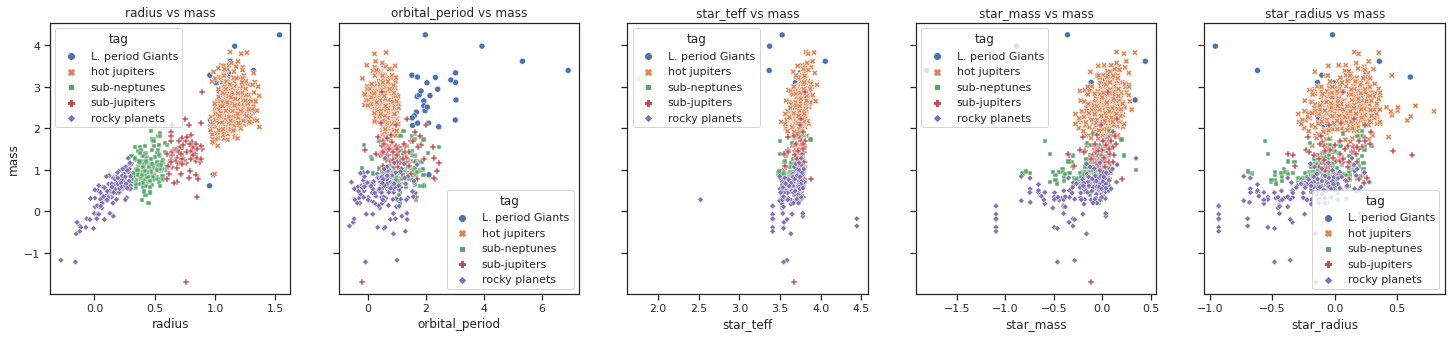

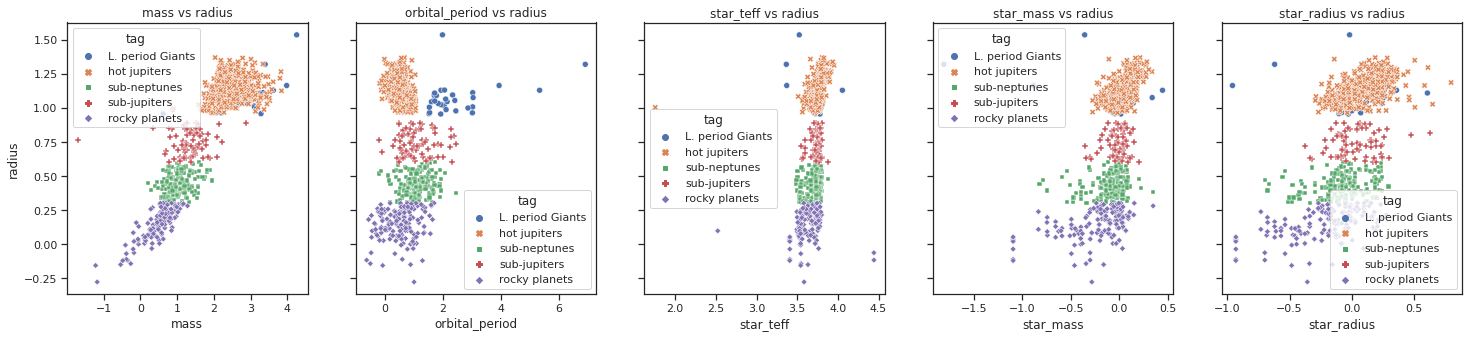

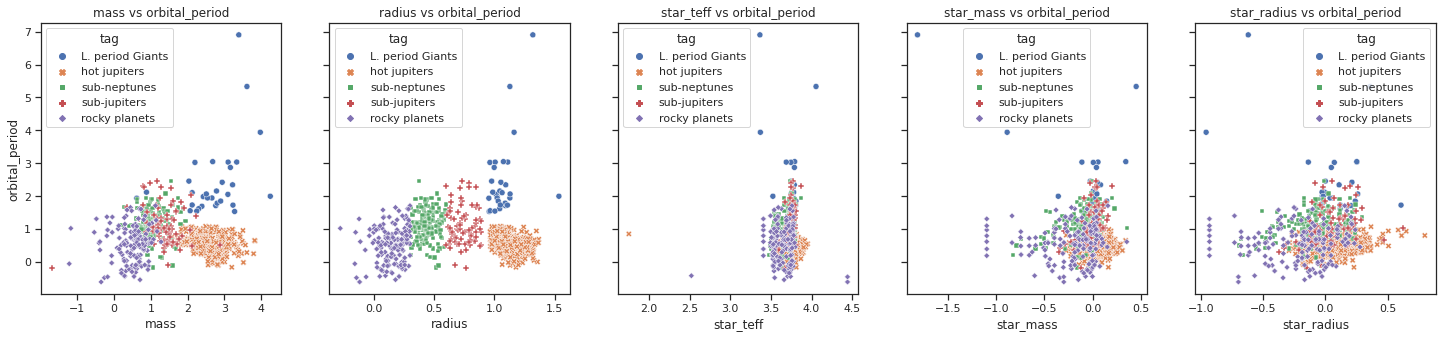

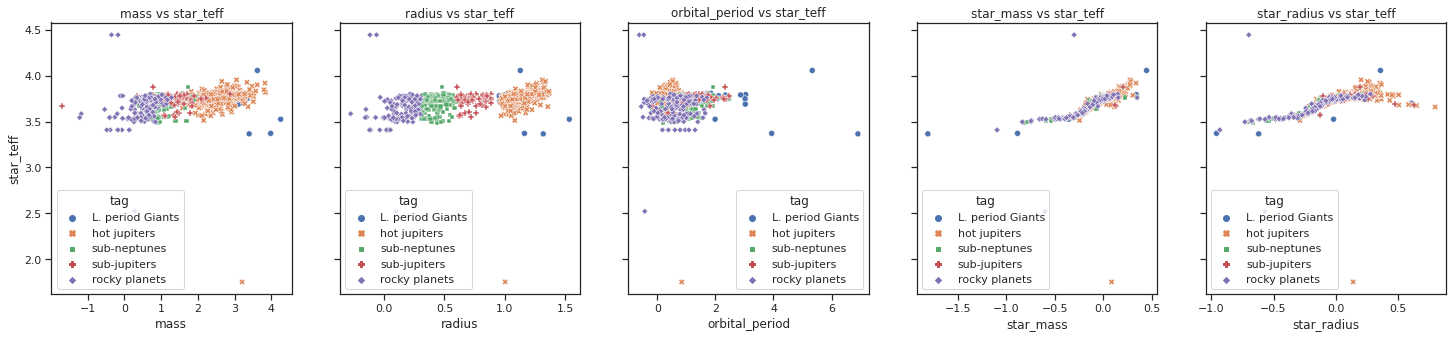

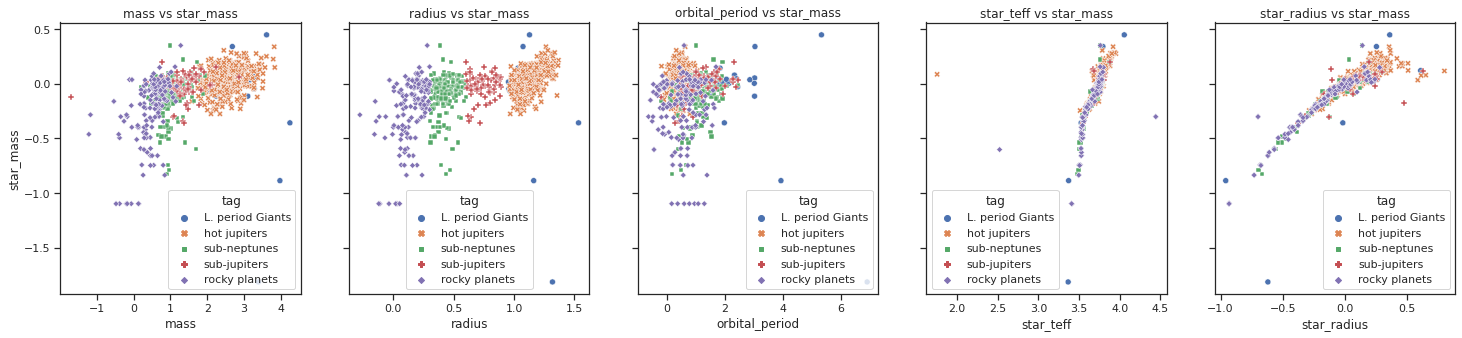

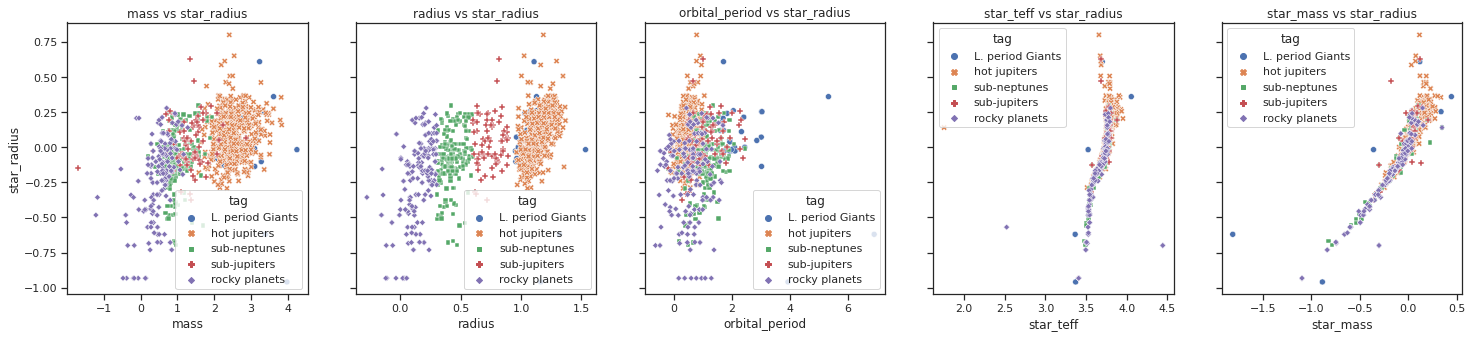

In [12]:


for param_y in params2:
    fig, axes = plt.subplots(1, 5, figsize=(25, 5), sharey=True)
    i = 0
    for param_x in params2:
        if(param_x != param_y):
            sns.scatterplot(ax = axes[i], data=data_labeled, x=param_x, y=param_y, hue = 'tag', style='tag')
            axes[i].set_title('{} vs {}'.format(param_x, param_y))
            i = i+1

            

In [13]:
### Umap visualisation ...

data_EU2 = data_EU[params2]
x = data_EU2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_US_scaled = pd.DataFrame(x_scaled)


new_data = data_EU[params2]

### min max scaling 
x = new_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
new_data_scaled = pd.DataFrame(x_scaled)

### UMAP transformation
umap_trans = umap.UMAP(n_neighbors=80, min_dist=0.05, metric='euclidean')
embedding_scaled = umap_trans.fit_transform(new_data_scaled)




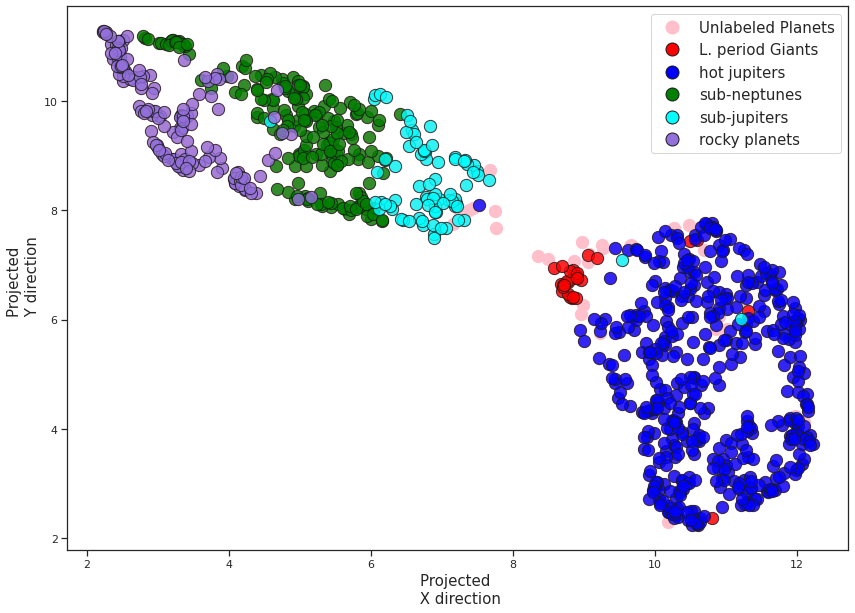

In [16]:
color = ['red','blue', 'green', 'cyan', 'mediumpurple', 'tab:red']
marker = ['o','o','o','o','o','o']
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding_scaled.T, s=150, c='pink',marker='o', alpha=1)

legend_elements = [Line2D([0], [0], c='pink',marker='o',lw=0,label='Unlabeled Planets',markersize=13)]
for i in range(5):
    legend_elements = np.append(legend_elements, Line2D([0], [0],lw=0,c=color[i],marker=marker[i],mec='k',markersize=13))
    group=names[i]
    plt.scatter(*embedding_scaled[np.array(group.index)].T,s=150,c=color[i],marker=marker[i],edgecolor='k',cmap='viridis',alpha=0.8)
plt.ylabel('Projected \n Y direction',fontsize=15)
plt.xlabel('Projected \n X direction',fontsize=15)
plt.legend(legend_elements, np.append(['Unlabeled Planets'],group_names), loc='best',fontsize=15)
plt.savefig("6p.pdf",dpi=1000,bbox_inches='tight')
plt.show()